<a href="https://colab.research.google.com/github/hyeoooniii43/ITB_2022_2/blob/main/Classification_1912354.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [1]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 후 import 코드부터 다시 실행해야 함 
import matplotlib.pyplot as plt
 
plt.rc('font', family='NanumBarunGothic')

In [2]:
%matplotlib inline
import pandas as pd # pandas 로딩
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

# data 가져오기
df = pd.read_csv('https://raw.githubusercontent.com/hyeoooniii43/ITB_2022_2/main/health_data.csv')

display(df.head(10))   # 처음 10행 확인

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,0.7,42.0,48.0,39.0,No,No,0,NaN,NaN,12/29/2021
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,0.6,22.0,11.0,10.0,No,No,0,NaN,NaN,12/29/2021


In [3]:
df.shape    # 전체 행과 열의 개수 출력
df.info()     # 10000개의 행 중에서 결측지가 있는 행과 타입 확인 가능.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [4]:
# 타겟변수 만들기  
conditions = [
    (df['수축기혈압'] < 120) & (df['이완기혈압'] < 80),
    (df['수축기혈압'] >= 120) & (df['수축기혈압'] < 130) & (df['이완기혈압'] < 80),
    (df['수축기혈압'] >= 130) & (df['수축기혈압'] < 140) | (df['이완기혈압'] >= 80) & (df['이완기혈압'] < 90),
    (df['수축기혈압'] >= 140) & (df['수축기혈압'] < 160) | (df['이완기혈압'] >= 90) & (df['이완기혈압'] < 100),
    (df['수축기혈압'] >= 160) | (df['이완기혈압'] >= 100),
    (df['수축기혈압'] >= 140) & (df['이완기혈압'] < 90)
]
values = ["정상", "주의", "고혈압 전단계", "고혈압 1기", "고혈압 2기", "수축기 단독 고혈압"]

import numpy as np

df["혈압 분류"] = np.select(conditions, values)
df.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,혈압 분류
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,주의
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,정상
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,고혈압 전단계
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,고혈압 전단계
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,고혈압 전단계


In [5]:
#타겟변수로 만든 컬럼의 결측지 제거
df_1 = df.copy()
# 결측치 확인
display(df_1['수축기혈압'].isna().sum())

88

In [6]:
# 결측지 제거
df1 = df_1.dropna(subset = ['수축기혈압'])
display(df1['수축기혈압'].isna().sum()) # 결측치 제거 완료

0

고혈압 전단계    4194
정상         3331
주의         1439
고혈압 1기      870
고혈압 2기       78
Name: 혈압 분류, dtype: int64


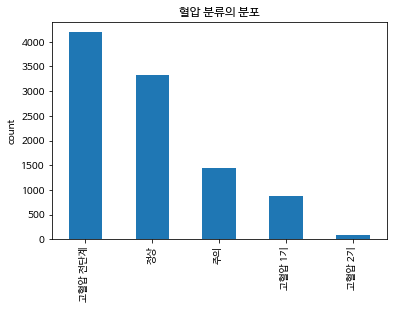

In [10]:
# 분포 시각적으로 알아보기
print(df1['혈압 분류'].value_counts())

df1['혈압 분류'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('혈압 분류의 분포')
plt.show()

In [19]:
# 사용할 컬럼 결측지 제거
df2 = df1.copy()
df2 = df1.dropna(subset = ['LDL콜레스테롤'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3977 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         3977 non-null   int64  
 1   가입자일련번호      3977 non-null   int64  
 2   시도코드         3977 non-null   int64  
 3   성별코드         3977 non-null   object 
 4   연령대코드(5세단위)  3977 non-null   int64  
 5   신장(5Cm단위)    3977 non-null   int64  
 6   체중(5Kg 단위)   3977 non-null   int64  
 7   허리둘레         3977 non-null   float64
 8   시력(좌)        3977 non-null   float64
 9   시력(우)        3977 non-null   float64
 10  청력(좌)        3977 non-null   int64  
 11  청력(우)        3977 non-null   int64  
 12  수축기혈압        3977 non-null   float64
 13  이완기혈압        3977 non-null   float64
 14  식전혈당(공복혈당)   3977 non-null   float64
 15  총콜레스테롤       3977 non-null   float64
 16  트리글리세라이드     3977 non-null   float64
 17  HDL콜레스테롤     3977 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소   

In [30]:
print(df2.columns)

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자', '혈압 분류'],
      dtype='object')


In [55]:
# 사용할 컬럼만 추출
df3 = df2[['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '식전혈당(공복혈당)', 
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈압 분류']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3977 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         3977 non-null   object 
 1   연령대코드(5세단위)  3977 non-null   int64  
 2   신장(5Cm단위)    3977 non-null   int64  
 3   체중(5Kg 단위)   3977 non-null   int64  
 4   허리둘레         3977 non-null   float64
 5   식전혈당(공복혈당)   3977 non-null   float64
 6   총콜레스테롤       3977 non-null   float64
 7   트리글리세라이드     3977 non-null   float64
 8   HDL콜레스테롤     3977 non-null   float64
 9   LDL콜레스테롤     3977 non-null   float64
 10  혈압 분류        3977 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 501.9+ KB


In [58]:
# 성별 변수 숫자로 변경
df3.loc[df3['성별코드'] == 'M', '성별코드'] = 0
df3.loc[df3['성별코드'] == 'F', '성별코드'] = 1

In [61]:
# 변수 형태 변경
df3 = df3.astype({'성별코드':'float64'})
df3 = df3.astype({'연령대코드(5세단위)':'float64'})
df3 = df3.astype({'신장(5Cm단위)':'float64'})
df3 = df3.astype({'체중(5Kg 단위)':'float64'})
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3977 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         3977 non-null   float64
 1   연령대코드(5세단위)  3977 non-null   float64
 2   신장(5Cm단위)    3977 non-null   float64
 3   체중(5Kg 단위)   3977 non-null   float64
 4   허리둘레         3977 non-null   float64
 5   식전혈당(공복혈당)   3977 non-null   float64
 6   총콜레스테롤       3977 non-null   float64
 7   트리글리세라이드     3977 non-null   float64
 8   HDL콜레스테롤     3977 non-null   float64
 9   LDL콜레스테롤     3977 non-null   float64
 10  혈압 분류        3977 non-null   object 
dtypes: float64(10), object(1)
memory usage: 501.9+ KB


,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈압 분류
0,0.0,9.0,165.0,60.0,72.1,90.0,188.0,58.0,58.0,118.0,주의
4,1.0,12.0,155.0,50.0,75.2,110.0,220.0,171.0,53.0,133.0,고혈압 전단계
5,0.0,9.0,185.0,85.0,94.0,86.0,234.0,183.0,50.0,147.0,정상
6,0.0,9.0,165.0,80.0,93.0,250.0,119.0,265.0,26.0,40.0,정상
8,1.0,17.0,150.0,50.0,82.0,104.0,177.0,61.0,63.0,101.0,고혈압 전단계


# **의사결정나무**

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 샘플 data 만들기 위해

X = df3.iloc[:, :10]  # 10개 변수
y = df3['혈압 분류']   # target 변수 혈압 분류

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # 변수 4개 순서 중요
tree = DecisionTreeClassifier(random_state=0)  # 초기화 
tree.fit(X_train, y_train) # 아무것도 설정x 학습용에만 정확히 맞는 나무 생성
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train))) # score: 얼마나 잘 만들어졌는지 점수로 확인
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.347


In [72]:
# 과적합 줄이기 위해 max_depth 바꿔보기
tree = DecisionTreeClassifier(max_depth=7, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.550
시험용 데이터 정확도: 0.470


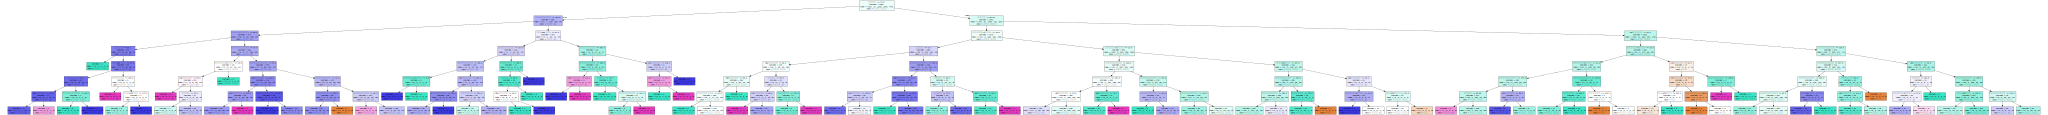

In [73]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", 
                class_names=["정상", "주의", "고혈압 전단계", "고혈압 1기", "고혈압 2기", "수축기 단독 고혈압"], 
                feature_names=df3.columns[:10], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

변수의 중요도:
 [0.02773415 0.10440344 0.0383907  0.02971626 0.28443931 0.12363218
 0.04215957 0.17445711 0.0746979  0.10036936]


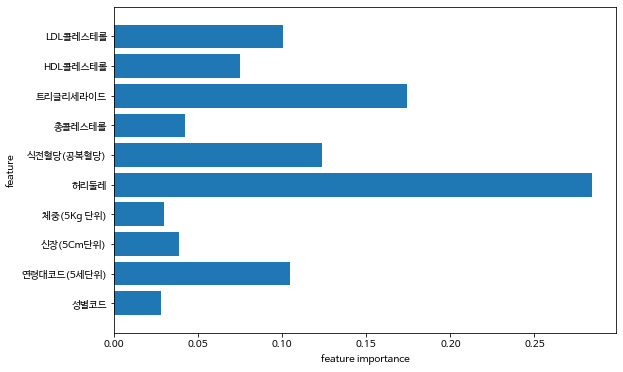

In [75]:
# 주요 변수 알아보기
result = tree.feature_importances_
print("변수의 중요도:\n", result)

def plot_feature_importances_df(model):
    plt.rcParams["figure.figsize"] = (9,6) # 사이즈 조정 (가로, 세로)
    n_features = len(df3.columns[:10]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df3.columns[:10])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정

plot_feature_importances_df(tree)

- 허리둘레를 가장 많이 사용하였고 그 다음은 트리글리세라이드이다.

# 랜덤 포레스트

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


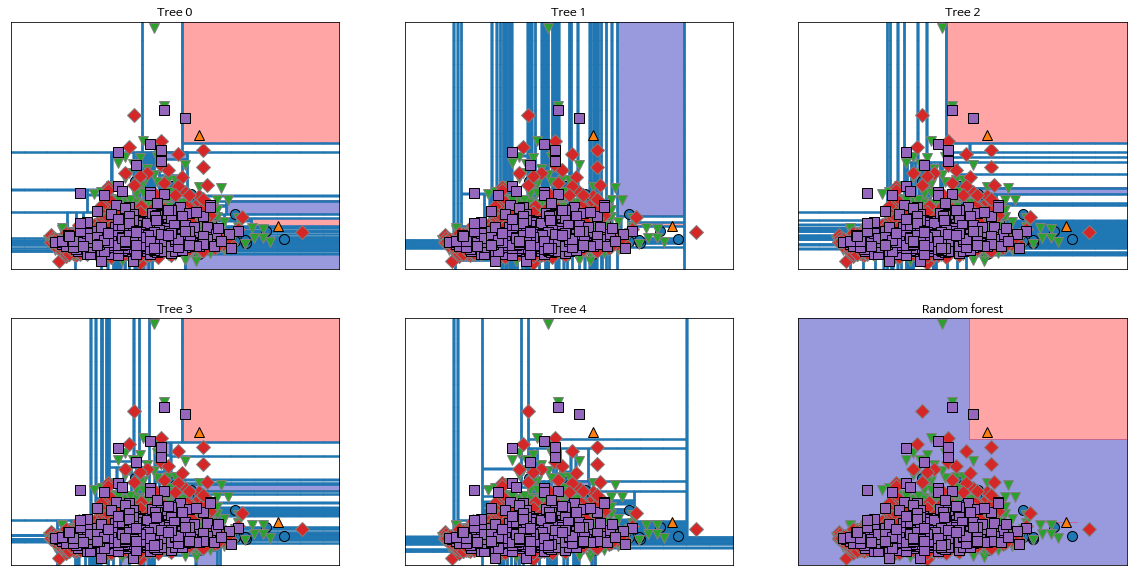

In [86]:
from sklearn.ensemble import RandomForestClassifier
import mglearn 

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 4:6], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 4:6].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 4:6].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 4], X.iloc[:, 5], y)
plt.show()

In [87]:
# 10개 변수를 모두 이용하여 100개의 나무 생성

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.465


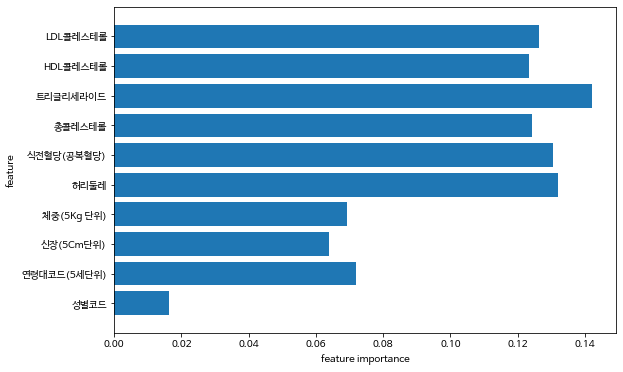

In [88]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_df(forest)

In [84]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.35785953 0.35451505 0.3557047  0.3590604  0.32550336 0.32214765
 0.3590604  0.40604027 0.37248322 0.37583893]
Random forest:  [0.46822742 0.46153846 0.46644295 0.4966443  0.47986577 0.41946309
 0.44966443 0.46644295 0.46644295 0.47315436]
Accuracy mean
Decision tree :0.359
Random forest :0.465


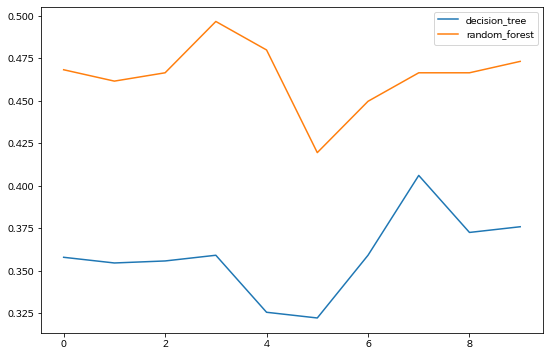

In [85]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

- 랜덤 포레스트가 의사결정나무 모델보다 더 높은 성능을 보이고 있다.

# 그래디언트 부스팅

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [90]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.610
시험용 데이터 세트 정확도: 0.498


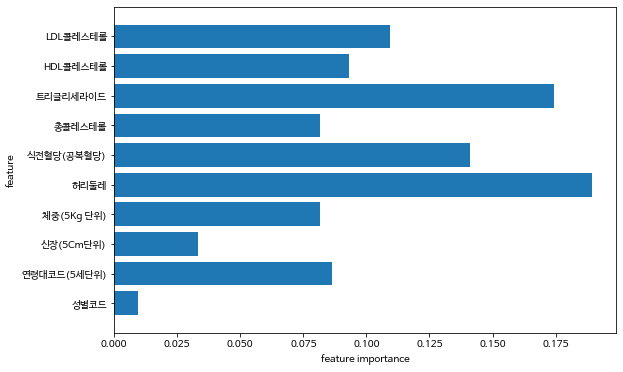

In [92]:
plot_feature_importances_df(gbrt) 

- 위의 두 모델보다 학습용 정확도, 시험용 정확도 모두 준수하다.

# 평과 결과

In [93]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

# 모델 3개 만들어서 비교
dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.36454849 0.37123746 0.3557047  0.35234899 0.40604027 0.37583893
 0.34899329 0.44630872 0.31208054 0.32885906]
Random forest:  [0.46822742 0.46153846 0.46644295 0.4966443  0.47986577 0.41946309
 0.44966443 0.46644295 0.46644295 0.47315436]
Gradient boosting:  [0.46153846 0.4916388  0.45637584 0.44630872 0.53691275 0.43288591
 0.44630872 0.48657718 0.4295302  0.4966443 ]
Accuracy mean
Decision tree :0.366
Random forest :0.465
Gradient boosting :0.468


- 그래디언트 부스팅이 시험용 데이터 정확도가 가장 높음을 알 수 있다.